<a href="https://colab.research.google.com/github/Devputta/Final-Year-Project/blob/main/DBSCAN(ALG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
# --- Load and preprocess the dataset ---
df = pd.read_csv('/content/water_data.csv')

In [ ]:
# Encode categorical values
df['tank_level'] = df['tank_level'].map({
    'WATER LEVEL <25%': 1,
    'WATER LEVEL >25% & <50%': 2,
    'WATER LEVEL >50% & <75%': 3
})

In [ ]:
# Specify the correct format for the timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M")

In [ ]:
# Drop irrelevant or string columns
df_clean = df.drop(columns=['timestamp', 'tank_message'])

In [ ]:
# --- Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [ ]:
# --- Apply DBSCAN clustering ---
db = DBSCAN(eps=1.5, min_samples=3)  # Try tuning eps and min_samples
labels = db.fit_predict(X_scaled)
df['cluster'] = labels

In [ ]:
# --- Visualize the clusters using PCA (for 2D plotting) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

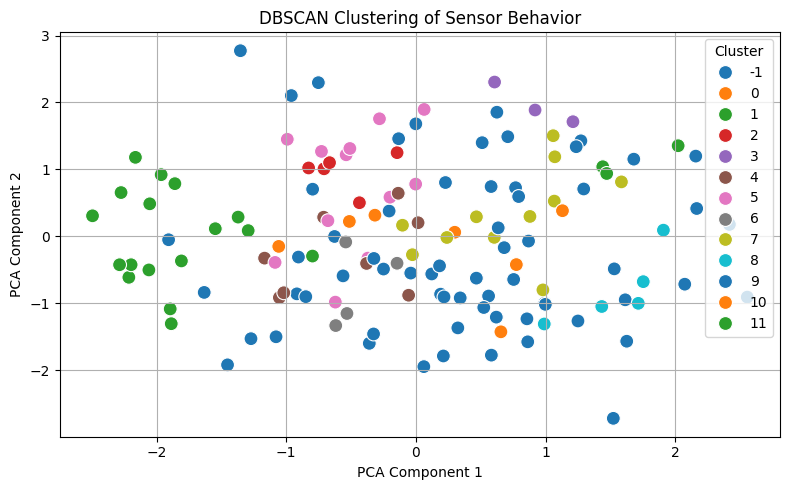

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', s=100)
plt.title('DBSCAN Clustering of Sensor Behavior')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Extract only date part from timestamp
df['date'] = df['timestamp'].dt.date

In [ ]:
# Group dates by cluster
cluster_groups = df.groupby('cluster')['date'].unique()

In [ ]:
# Print the result
print("\n🔍 Dates in Each Cluster:")
for cluster_label, dates in cluster_groups.items():
    print(f"Cluster {cluster_label}:")
    for d in dates:
        print(f"  - {d}")


🔍 Dates in Each Cluster:
Cluster -1:
  - 2025-01-02
  - 2025-01-05
  - 2025-01-07
  - 2025-01-09
  - 2025-01-11
  - 2025-01-16
  - 2025-01-19
  - 2025-01-20
  - 2025-01-21
  - 2025-01-24
  - 2025-01-26
  - 2025-01-27
  - 2025-01-28
  - 2025-01-29
  - 2025-01-30
  - 2025-02-03
  - 2025-02-04
  - 2025-02-05
  - 2025-02-07
  - 2025-02-09
  - 2025-02-13
  - 2025-02-15
  - 2025-02-16
  - 2025-02-19
  - 2025-02-23
  - 2025-02-28
  - 2025-03-01
  - 2025-03-07
  - 2025-03-10
  - 2025-03-14
  - 2025-03-16
  - 2025-03-19
  - 2025-03-20
  - 2025-03-21
  - 2025-03-22
  - 2025-03-23
  - 2025-03-25
  - 2025-03-26
  - 2025-04-01
  - 2025-04-03
  - 2025-04-04
  - 2025-04-05
  - 2025-04-07
  - 2025-04-09
  - 2025-04-10
  - 2025-04-11
  - 2025-04-12
  - 2025-04-13
  - 2025-04-20
  - 2025-04-22
  - 2025-04-23
  - 2025-05-01
  - 2025-05-03
  - 2025-05-04
  - 2025-05-08
  - 2025-05-09
  - 2025-05-10
  - 2025-05-14
  - 2025-05-15
  - 2025-05-16
Cluster 0:
  - 2025-01-01
  - 2025-04-26
  - 2025-05-12
Cluste